# K-Means code and illustration used in class

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import matplotlib as mpl
import seaborn as sns

In [ ]:
sns.set_style('white')

## K-Means algorithm

This is the k-means code shown in class, with an additional method to plot the clusters.

In [ ]:
def plot_clusters(X, centers, assignments):
    figure(figsize=(9,6))
    scatter(X[:,0], X[:,1], c=assignments, s=60, alpha=0.6, cmap=plt.cm.Set2, lw=1, edgecolors='k')
    scatter(centers[:,0], centers[:,1], s=140, c='orange')
    show()

def kmeans(data, k=3, max_iters=100):
    
    # precompute norms of data for fast distance computations
    data_norms = np.sum(data**2, axis=1)
    
    def get_distances_to_centers(centers):
        
        # binomial trick for fast distance computations
        center_norms = np.sum(centers ** 2, axis=1)
        dists = np.dot(data, centers.T)
        dists *= -2.0
        dists += center_norms[np.newaxis,:]
        dists += data_norms[:,np.newaxis]
        return dists
    
    def get_assignments(centers):
        dists = get_distances_to_centers(centers)
        assignments = np.argmin(dists, 1).astype(np.uint32)
        return dists, assignments
    
    def get_updated_centers(assignments):
        centers = [data[assignments==i,:].mean(axis=0) for i in range(k)]
        return np.array(centers)
    
    def get_initial_centers():
        N = data.shape[0]
        indices = np.random.randint(0, N, k)
        return data[indices, :]
    
    # start off with initial random centers
    centers = get_initial_centers()
    
    # remember previous assigmnents to check for convergence
    prev_assignments = None
    
    for i in range(max_iters):
        
        # fix centers and update assignments
        dists, assignments = get_assignments(centers)
        
        # fix assignments and update centers
        centers = get_updated_centers(assignments)
        
        # if nothing changes, we have converged
        if prev_assignments is not None:
            if np.sum(assignments != prev_assignments) == 0:
                break
        
        prev_assignments = assignments
    
    return assignments, centers
    

This is a modified version that plots the evolution of the clusters as the algorithm executes

In [ ]:
def kmeans_plot_evolution(data, k=3, max_iters=100):
    
    data_norms = np.sum(data**2, axis=1)
    
    def get_distances_to_centers(centers):
        center_norms = np.sum(centers ** 2, axis=1)
        dists = np.dot(data, centers.T)
        dists *= -2.0
        dists += center_norms[np.newaxis,:]
        dists += data_norms[:,np.newaxis]
        return dists
    
    def get_assignments(centers):
        dists = get_distances_to_centers(centers)
        assignments = np.argmin(dists, 1).astype(np.uint32)
        return dists, assignments
    
    def get_updated_centers(assignments):
        centers = [data[assignments==i,:].mean(axis=0) for i in range(k)]
        return np.array(centers)
    
    def get_initial_centers():
        N = data.shape[0]
        indices = np.random.randint(0, N, k)
        return data[indices, :]
    
    centers = get_initial_centers()
    
    old_assignments = None
    for i in range(max_iters):
        dists, assignments = get_assignments(centers)
        plot_clusters(data, centers, assignments)
        print('energy:', dists.sum())
        centers = get_updated_centers(assignments)
        plot_clusters(data, centers, assignments)
        if old_assignments is not None:
            changed = np.sum(assignments != old_assignments)
            if changed == 0:
                print('converged')
                break
        old_assignments = assignments
    
    return assignments, centers
    

## Generate some data

In [ ]:
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(random_state=1)

In [ ]:
print(X.shape, y.shape)

(100, 2) (100,)


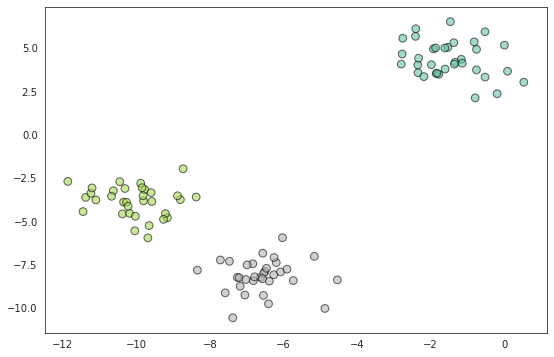

In [ ]:
figure(figsize=(9,6))
scatter(X[:,0], X[:,1], c=y, s=60, alpha=0.6, cmap=plt.cm.Set2, lw=1, edgecolors='k')

## Run K-means

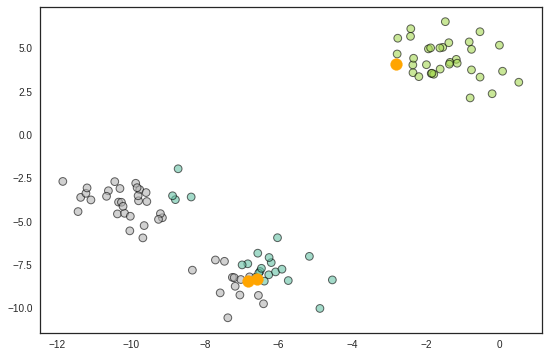

energy: 24712.54967915437


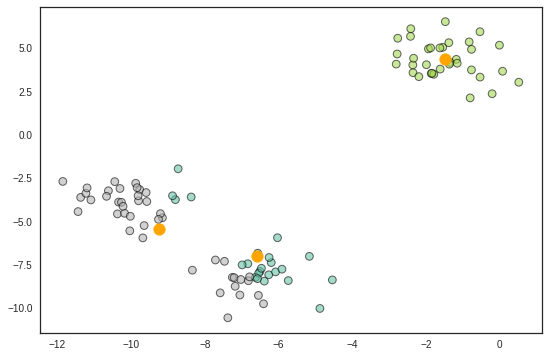

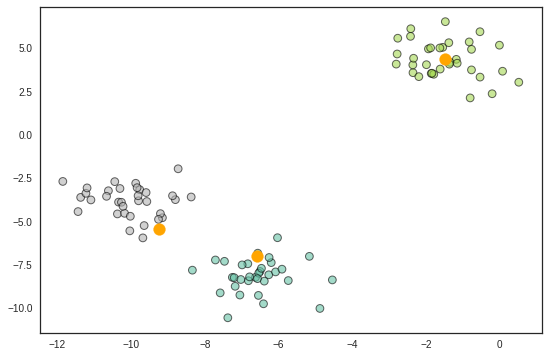

energy: 23103.683878584783


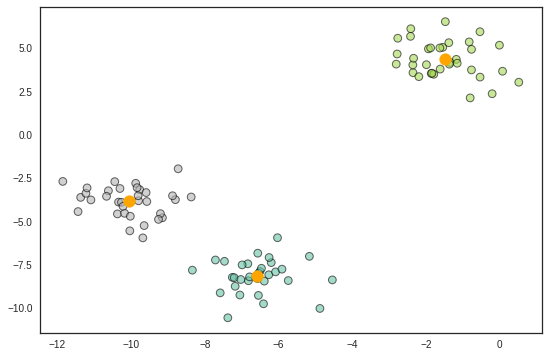

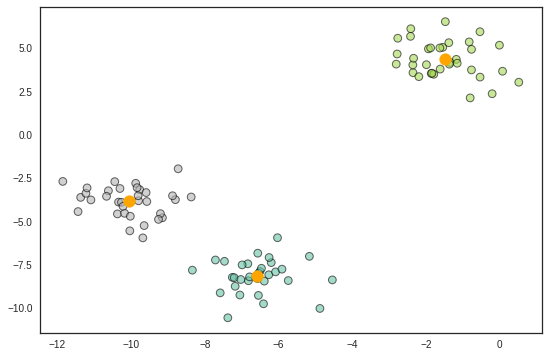

energy: 24156.802215793752


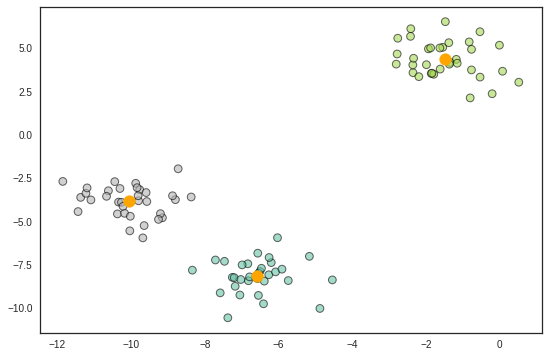

converged


In [ ]:
np.random.seed(31337)
assignments, centers = kmeans_plot_evolution(X)

In [ ]:
print(centers)

[[ -6.58196786  -8.17239339]
 [ -1.4710815    4.33721882]
 [-10.04935243  -3.85954095]]


In [ ]:
print(assignments)

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
